# Chapter 27

# Deep Learning II

1. Deep learning
2. Introduction to Tensorflow
3. Introduction to Keras

## Deep learning

## Introduction to Tensorflow

## Introduction to Keras

In [2]:
!pip install -q tensorflow
!pip install -q scikit-learn


In [3]:

import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

print(tf.__version__)


2.7.0


In [5]:

datasetFileName = "../gokPrj/alldataset.npz"

with np.load(datasetFileName, allow_pickle=True) as data:
    dataImages = data['images']
    dataLabels = data['labels']
    dataLabelNames = data['labelnames']


print(dataImages.shape)
print(dataLabels.shape)
print(dataLabelNames.shape)


(259,)
(259,)
(259,)


In [6]:
print(dataImages.dtype)
print(dataLabels.dtype)
print(dataLabelNames.dtype)

print(dataImages.shape)
print(dataLabels.shape)
print(dataLabelNames.shape)


object
int32
<U10
(259,)
(259,)
(259,)


In [7]:
dataLabels[0]

0

In [8]:
dataLabelNames

array(['afiq', 'azureen', 'gavin', 'goke', 'inamul', 'jincheng',
       'mahmuda', 'numan', 'saseendran', 'afiq', 'azureen', 'goke',
       'numan', 'afiq', 'azureen', 'goke', 'numan', 'afiq', 'azureen',
       'goke', 'inamul', 'mahmuda', 'numan', 'saseendran', 'afiq',
       'azureen', 'goke', 'inamul', 'mahmuda', 'numan', 'saseendran',
       'afiq', 'azureen', 'gavin', 'goke', 'mahmuda', 'numan',
       'saseendran', 'afiq', 'azureen', 'gavin', 'goke', 'inamul',
       'jincheng', 'mahmuda', 'numan', 'saseendran', 'afiq', 'azureen',
       'goke', 'inamul', 'mahmuda', 'numan', 'azureen', 'gavin', 'goke',
       'mahmuda', 'numan', 'afiq', 'azureen', 'goke', 'inamul', 'mahmuda',
       'numan', 'azureen', 'gavin', 'goke', 'mahmuda', 'numan',
       'saseendran', 'afiq', 'azureen', 'gavin', 'goke', 'inamul',
       'jincheng', 'mahmuda', 'numan', 'saseendran', 'gavin', 'goke',
       'mahmuda', 'numan', 'saseendran', 'afiq', 'azureen', 'goke',
       'inamul', 'numan', 'azureen', 'go

In [9]:
classNames = sorted(np.unique(dataLabelNames))
classNames

['afiq',
 'azureen',
 'gavin',
 'goke',
 'inamul',
 'jincheng',
 'mahmuda',
 'numan',
 'saseendran']

In [10]:
# model expect shape of image to be 200x200

import cv2 as cv

desiredShape = (200, 200, 3)

N = len(dataImages)
shape = (N, desiredShape[0], desiredShape[1], desiredShape[2])

y = np.empty(shape, dtype='uint8')

for i in range(N):
    y[i] = cv.resize(dataImages[i], [200,200], interpolation=cv.INTER_NEAREST)

dataImages.dtype, y.dtype, y.shape

dataImages = y

In [11]:
dataLabels = dataLabels.astype('uint8')
dataLabels.dtype

dtype('uint8')

In [12]:

# Split the data up in train and test sets
trainImages, testImages, trainLabels, testLabels = train_test_split(dataImages, dataLabels, test_size=0.3, random_state=42)

print(trainImages.shape)
print(testImages.shape)


(181, 200, 200, 3)
(78, 200, 200, 3)


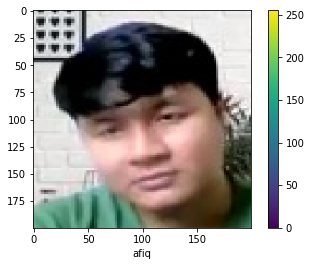

In [13]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(trainImages[0])
plt.xlabel(classNames[trainLabels[0]])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
inputShape = trainImages[0].shape
outputShape = len(classNames)

inputShape, outputShape

((200, 200, 3), 9)

In [15]:
trainImages = trainImages / 255.0
testImages = testImages / 255.0


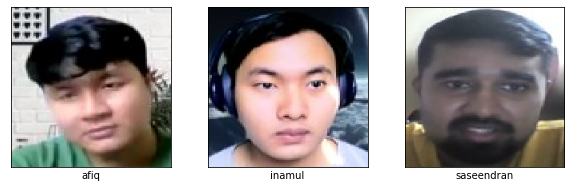

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainImages[i], cmap=plt.cm.binary)
    plt.xlabel(classNames[trainLabels[i]])
plt.show()

In [18]:
# creating the model
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=inputShape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(outputShape) #,
    # tf.keras.layers.Softmax()
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 120000)            0         
                                                                 
 dense (Dense)               (None, 128)               15360128  
                                                                 
 dense_1 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 15,361,289
Trainable params: 15,361,289
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
testImages.dtype

dtype('float64')

In [21]:
fitResult = model.fit(trainImages, trainLabels, epochs=10)

Epoch 1/10
6/6 [==============================] - 3s 182ms/step - loss: 59.9806 - accuracy: 0.1271
Epoch 2/10
6/6 [==============================] - 1s 195ms/step - loss: 42.3082 - accuracy: 0.2873
Epoch 3/10
6/6 [==============================] - 1s 186ms/step - loss: 13.4554 - accuracy: 0.4199
Epoch 4/10
6/6 [==============================] - 1s 190ms/step - loss: 7.9343 - accuracy: 0.3923
Epoch 5/10
6/6 [==============================] - 1s 217ms/step - loss: 4.0830 - accuracy: 0.4530
Epoch 6/10
6/6 [==============================] - 1s 193ms/step - loss: 1.4422 - accuracy: 0.6796
Epoch 7/10
6/6 [==============================] - 1s 196ms/step - loss: 1.1648 - accuracy: 0.7403
Epoch 8/10
6/6 [==============================] - 1s 181ms/step - loss: 0.8377 - accuracy: 0.8177
Epoch 9/10
6/6 [==============================] - 1s 188ms/step - loss: 0.4396 - accuracy: 0.8840
Epoch 10/10
6/6 [==============================] - 1s 199ms/step - loss: 0.2643 - accuracy: 0.9006


In [29]:
fitResult.history

{'loss': [59.98057556152344,
  42.30818557739258,
  13.455368041992188,
  7.934311389923096,
  4.083024501800537,
  1.4421651363372803,
  1.1648131608963013,
  0.8377412557601929,
  0.43962928652763367,
  0.2642762362957001],
 'accuracy': [0.1270718276500702,
  0.28729280829429626,
  0.41988950967788696,
  0.3922652006149292,
  0.45303866267204285,
  0.6795580387115479,
  0.7403314709663391,
  0.8176795840263367,
  0.8839778900146484,
  0.90055251121521]}

In [32]:
testLoss, testAcc = model.evaluate(testImages,  testLabels, verbose=2)

print('\nTest accuracy:', testAcc)
testLoss, testAcc

3/3 - 0s - loss: 0.7629 - accuracy: 0.8077 - 247ms/epoch - 82ms/step

Test accuracy: 0.807692289352417


(0.7628533244132996, 0.807692289352417)

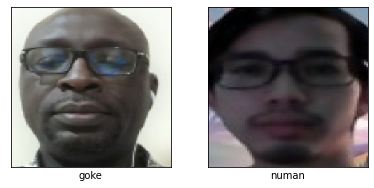

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(2):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(testImages[i], cmap=plt.cm.binary)
    plt.xlabel(classNames[testLabels[i]])
plt.show()

In [34]:
predictions = model.predict(testImages)
predictions[0]

array([ -0.32926652,  -5.3598504 ,  -8.647404  ,  17.792892  ,
       -24.084017  ,  14.477199  , -21.987814  ,   4.145619  ,
         4.3197184 ], dtype=float32)

In [35]:
i = 1
predictedLabel = np.argmax(predictions[i])
predictedLabel, testLabels[i], predictedLabel == testLabels[i]

(5, 7, False)

### Using Softmax

Softmax layer assist in turning the prediction values to fractions. Showing the highest value as the most likely.

In [36]:
probabilityModel = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probabilityModel.predict(testImages)
predictions[0]


array([1.3006380e-08, 8.4996572e-11, 3.1742048e-12, 9.6496081e-01,
       6.2748003e-19, 3.5036616e-02, 5.1046685e-18, 1.1417575e-06,
       1.3588907e-06], dtype=float32)

In [37]:
np.argmax(predictions[0]), testLabels[0]

(3, 3)

### Saving Model

In [ ]:
import os

exportPath = ""

# if testAcc > 0.95:
modelDir = 'tf_model'
version = f"4_{(testAcc*100):.0f}"

# for SavedModel format
exportPath = os.path.join(modelDir, version)

# save the model
model.save(exportPath, save_format="tf")

print('\nexport path = {}'.format(exportPath))

!dir {exportPath}

### Load Model

In [ ]:
# load SavedModel format

exportPath = 'C:/zs/cv/advance/tf_model/4_0'
newModel = tf.keras.models.load_model(exportPath)

# Check its architecture
newModel.summary()

In [ ]:
# Evaluate the restored model
loss, acc = newModel.evaluate(testImages, testLabels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

newPredictions = newModel.predict(testImages)

print(newPredictions.shape)

newPredictions[0]

In [ ]:
print("prediction: ", np.argmax(newPredictions[0]))
print("actual: ", testLabels[0])


In [ ]:
probabilityModel = tf.keras.Sequential([newModel, tf.keras.layers.Softmax()])

newPredictions = probabilityModel.predict(testImages)
newPredictions[0]


## Simulation for Best Models

In [38]:
# %%
maxIterations = 10
testAccList = []
thresholdAcc = 0.97
lastTestAcc = 0.0

model = None
testLoss = 0.0
testAcc = 0.0
modelDir = 'tf_model'
epoch=10

for iter in range(maxIterations):

    print(f'simulation {iter + 1}', end='... ')

    model = tf.keras.Sequential([
        # tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Flatten(input_shape=inputShape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(outputShape)
    ])
    # model.summary()

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(
                      from_logits=True),
                  metrics=['accuracy'])

    # model training
    model.fit(trainImages, trainLabels, epochs=epoch, verbose=0)

    # model testing
    testLoss, testAcc = model.evaluate(testImages,  testLabels, verbose=0)

    # store the accuracy
    testAccList.append(testAcc)

    # print('\nTest accuracy:', testAcc)
    print(f'test accuracy {testAcc}', end='... ')

    exportPath = ""

    # save model if greater than threshold-accuracy 0.95
    if testAcc > thresholdAcc:
        # SavedModel format
        version = f"4_{(testAcc*100):.0f}"

        # for SavedModel format
        exportPath = os.path.join(modelDir, version)
        # save the model
        model.save(exportPath, save_format="tf")
        # print(f'\nexport path = {exportPath}')
        print(f'export path = {exportPath}', end='')

        # # HDF5 format
        # exportPath = os.path.join(modelDir, f"{version}.h5")
        # # Save the entire model to a HDF5 file.
        # # The '.h5' extension indicates that the model should be saved to HDF5.
        # model.save(exportPath)
        # print("saved: ", exportPath)

        thresholdAcc = testAcc
        
    print('.')
    


simulation 1... test accuracy 0.9102563858032227... .
simulation 2... test accuracy 0.8589743375778198... .
simulation 3... test accuracy 0.9358974099159241... .
simulation 4... WARNING:tensorflow:5 out of the last 19 calls to <function Model.make_test_function.<locals>.test_function at 0x00000143ED933700> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
test accuracy 0.8717948794364929... .
simulation 5... WARNING:tensorflow:5 out of the l

# Example

Simulate until a threshold accuracy value is obtained else 1000 max iteration.

In [ ]:
# %%
maxIterations = 10
testAccList = []
thresholdAcc = 0.97
lastTestAcc = 0.0

model = None
testLoss = 0.0
testAcc = 0.0
modelDir = 'tf_model'
epoch=10

for iter in range(maxIterations):

    print(f'simulation {iter + 1}', end='... ')

    model = tf.keras.Sequential([
        # tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Flatten(input_shape=inputShape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(outputShape)
    ])
    # model.summary()

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(
                      from_logits=True),
                  metrics=['accuracy'])

    # model training
    model.fit(trainImages, trainLabels, epochs=epoch, verbose=0)

    # model testing
    testLoss, testAcc = model.evaluate(testImages,  testLabels, verbose=0)

    # store the accuracy
    testAccList.append(testAcc)

    # print('\nTest accuracy:', testAcc)
    print(f'test accuracy {testAcc}', end='... ')

    exportPath = ""

    # save model if greater than threshold-accuracy 0.95
    if testAcc > thresholdAcc:
        # SavedModel format
        version = f"4_{(testAcc*100):.0f}"

        # for SavedModel format
        exportPath = os.path.join(modelDir, version)
        # save the model
        model.save(exportPath, save_format="tf")
        # print(f'\nexport path = {exportPath}')
        print(f'export path = {exportPath}', end='')

        # # HDF5 format
        # exportPath = os.path.join(modelDir, f"{version}.h5")
        # # Save the entire model to a HDF5 file.
        # # The '.h5' extension indicates that the model should be saved to HDF5.
        # model.save(exportPath)
        # print("saved: ", exportPath)

        thresholdAcc = testAcc
        
    print('.')
    


# Assignment


1. Upload your [yourname]dataset.npz to whatapp group
2. Vary the parameters from spliting data into trainImage and testImage to find the best accuracy.
3. Predict and dispaly your predictions.

# Assignment 

1. Convert the dataset images to grayscale before training and testing.
Hint: remember that the input shape will change.

# 1 hour Workout

Send your images data to email: gokeladokun@gmail.com 